# Introduction

Welcome to the py-capella-mbse Showcase notebook. This notebook will show you some basic (and not so basic) things that you can get done using this library. For more advanced features have a look around the nearby notebooks.

The below code loads the library and one of the test models:

In [1]:
import capellambse

path_to_model = "../../../tests/data/models/test7_0/Model Test 7.0.aird"
model = capellambse.MelodyModel(path_to_model)
model

Let's go to the first practical example of working with the library!

## Example 1: Actor functions

The below code will print every Actor available in the Logical Architecture layer

In [2]:
for actor in model.la.all_actors:
    print(actor.name)

Prof. A. P. W. B. Dumbledore
Prof. S. Snape
Harry J. Potter
R. Weasley
Voldemort
Multiport


but we could also "zoom-in" to an actor of interest:

In [3]:
model.la.all_actors.by_name("Prof. S. Snape")

allocated_functions,"""Teaching"" (a7acb298-d14b-4707-a419-fea272434541) ""maintain a layer of defense for the Sorcerer's Stone"" (4a2a7f3c-d223-4d44-94a7-50dd2906a70c)"
allocated_interfaces,(Empty list)
applied_property_value_groups,"PropertyValueGroup ""DarkMagic.Power"" (2a480409-57d1-46f8-a0ce-e574706a9a7c) PropertyValueGroup ""DarkMagic.Power Level"" (b1d7453b-69ab-4d81-ab8b-1e48b5870340)"
applied_property_values,(Empty list)
architectures,(Empty list)
capability_pkg,None
component_exchange_categories,(Empty list)
component_exchanges,(Empty list)
component_realizations,(Empty list)
components,(Empty list)
constraints,(Empty list)


Using the `pandas` library, we can also easily export the data above in tabular format.

For that, first build up the table as pandas DataFrame:

In [4]:
import pandas as pd

data = []
for actor in model.la.all_actors:
    actor_functions = (
        "; ".join(function.name for function in actor.allocated_functions)
        or "no functions assigned"
    )
    data.append({"actor": actor.name, "functions": actor_functions})
df = pd.DataFrame(data)
df

,actor,functions
0,Prof. A. P. W. B. Dumbledore,manage the school; advise Harry
1,Prof. S. Snape,Teaching; maintain a layer of defense for the ...
2,Harry J. Potter,kill He Who Must Not Be Named
3,R. Weasley,assist Harry; break school rules
4,Voldemort,no functions assigned
5,Multiport,LAF 1


This DataFrame can then be processed as usual. For example, to export it as Excel Spreadsheet:

In [5]:
df.to_excel("01_intro_actor_functions.xlsx")

you can check the resulting file in the folder next to this notebook (right after you run the above cell)

Now that we've seen the basics, lets do something visually cool.

## Example 2: working with diagrams

The below code will find some diagrams for us.

In [6]:
for diagram in model.la.diagrams.by_type("LAB"):
    print(diagram.name)

[LAB] Wizard Education
[LAB] Test Component Port Filter
[LAB] Wizard Education (hidden functions)


We can analyze which model objects are shown in a particular diagram.

In [7]:
diagram = model.diagrams.by_name("[LAB] Wizard Education")
diagram.nodes

[0] <Part 'Hogwarts' (101ffa60-f8a2-4ea2-a0d8-d10910ceac06)>
[1] <LogicalFunction 'produce Great Wizards' (0e71a0d3-0a18-4671-bba0-71b5f88f95dd)>
[2] <LogicalFunction 'protect Students against the Death Eaters' (264fb47d-67b7-4bdc-8d06-8a0e5139edbf)>
[3] <Part 'Campus' (a3194240-cd17-4998-8f8b-785233487ec3)>
[4] <Part 'School' (018a8ae9-8e8e-4aea-8191-4abf844a79e3)>
[5] <LogicalFunction 'educate Wizards' (957c5799-1d4a-4ac0-b5de-33a65bf1519c)>
[6] <Part 'Whomping Willow' (1188fc31-789b-424f-a2d4-06791873a351)>
[7] <LogicalFunction 'defend the surrounding area against Intruders' (7f2936ab-0b54-4e92-9f0c-85a9f0981959)>
[8] <Part 'Prof. A. P. W. B. Dumbledore' (4c1f2b5d-0641-42c7-911f-7a42928580b8)>
[9] <LogicalFunction 'manage the school' (f708bc29-d69f-42a0-90cc-11fc01054cd0)>
[10] <LogicalFunction 'advise Harry' (beaf5ba4-8fa9-4342-911f-0266bb29be45)>
[11] <Part 'Prof. S. Snape' (ccbad61a-39dc-4af8-8199-3fee30de2f1d)>
[12] <LogicalFunction 'Teaching' (a7acb298-d14b-4707-a419-fea272434541)>
[13] <LogicalFunction "maintain a layer of defense for the Sorcerer's Stone" (4a2a7f3c-d223-4d44-94a7-50dd2906a70c)>
[14] <ComponentExchange 'Headmaster Responsibilities' (c0bc49e1-8043-4418-8c0a-de6c6b749eab)>
[15] <ComponentExchange 'Teacher Responsibilities' (9cbdd233-aff5-47dd-9bef-9be1277c77c3)>
[16] <Part 'Harry J. Potter' (26543596-7646-4d81-8f15-c4e01ec930a7)>
[17] <LogicalFunction 'kill He Who Must Not Be Named' (aa9931e3-116c-461e-8215-6b9fdbdd4a1b)>
[18] <Part 'R. Weasley' (4d31caaf-210e-4bdf-982e-cdecbc80c947)>
[19] <LogicalFunction 'assist Harry' (c1a42acc-1f53-42bb-8404-77a5c08c414b)>
[20] <LogicalFunction 'break school rules' (edbd1ad4-31c0-4d53-b856-3ffa60e0e99b)>
[21] <ComponentExchange 'Punishment' (85a1fb20-38ea-4d77-acd7-90a8c44dc695)>
[22] <FunctionalExchange 'wizardry' (6545a77d-d224-4662-a5b2-3c016b78e33d)>
[23] <PortAllocation (a4e2bf11-0705-4f20-bf73-5fa5519954f7)>
[24] <PortAllocation (7d31ab50-63d6-46bb-bf53-1716175beae3)>
[25] <PortAllocation (317715cb-376c-4df6-a32c-433e3c081f8d)>
[26] <ComponentExchange 'Learning' (3b3fc202-be5c-49ae-bf2f-1d61daf3bb50)>
[27] <PortAllocation (c1019d06-f376-48e3-832e-634a8ec59463)>
[28] <PortAllocation (4cbdf5fd-7268-470b-9811-b62ad67fded1)>
[29] <FunctionalExchange 'assistance' (241f3901-11f0-4b00-a903-ed158cce73de)>
[30] <FunctionalExchange 'friendship' (1bbb9b2d-517c-4f77-a35c-b3aa3f9422b8)>
[31] <PortAllocation (18fa81ee-8b16-4815-86ea-0c287ace43d8)>
[32] <ComponentExchange 'Help for Harry' (d8655737-39ab-4482-a934-ee847c7ff6bd)>
[33] <FunctionalExchange 'punish' (96a0cf4c-adfe-4490-92d1-bcf75ee77004)>
[34] <FunctionalExchange 'educate & mature' (09efaeb7-2d50-40ed-a4da-46afcb9ca7a1)>
[35] <FunctionalExchange 'Knowledge' (b1a817bc-40a9-4fc4-b62c-8dea4aa28915)>
[36] <PortAllocation (dda7a62a-f25f-46d8-8f05-867c616914c1)>
[37] <PortAllocation (fee1fff5-d751-401b-bb3c-2114a74f0c8a)>
[38] <PortAllocation (0f6e1aa0-942a-40a9-930f-c7df34b9d8eb)>
[39] <ComponentExchange 'Care' (c31491db-817d-44b3-a27c-67e9cc1e06a2)>
[40] <PortAllocation (98760017-b3a3-46ca-b1ef-87eee9ea1600)>
[41] <PortAllocation (74bd0ab3-6a28-4025-822e-90201445a56e)>
[42] <PortAllocation (3ed5ae4f-8a4e-4690-9088-655990a1b77b)>
[43] <PortAllocation (299b98b8-8716-4dbc-bc7e-4b9349778c26)>
[44] <PortAllocation (14cabdd9-c36f-4e01-ad09-110f906ad725)>
[45] <PortAllocation (6d882e28-4208-41d0-b8a5-3a19e1805a34)>
[46] <FunctionalExchange 'educate' (cdc69c5e-ddd8-4e59-8b99-f510400650aa)>
[47] <PortAllocation (c90bb30d-e36b-46a3-a3a1-e39fdcb519be)>

And again there are warnings - there are quite a few visual filters in Capella and we are not handling all of those yet but mostly those that are used in our projects. The filter coverage will eventally improve, stay tuned.

And finally, you can display the diagram right in the notebook.

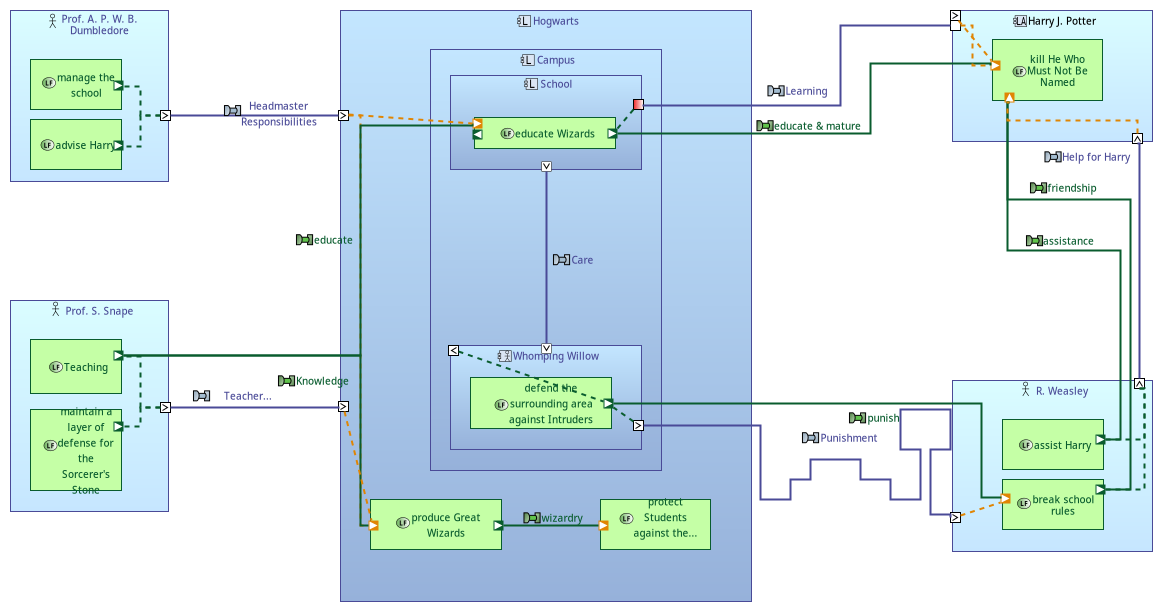

In [8]:
diagram

We use SVG diagrams a lot since they look great in documentation, are zoomable and really light-weight. To make integrating them into a pipeline easier, we also support some derived formats, which you can access using `.as_<format>` style attributes. With some additional dependencies set up (see the README), capellambse can also automatically convert these images to PNG format.

In [9]:
# fmt: off
print(repr(  diagram.as_svg          )[:100], "...")  # The raw SVG format as simple python `str`
print(repr(  diagram.as_datauri_svg  )[:100], "...")  # An SVG, base64-encoded as `data:` URI
print(repr(  diagram.as_html_img     )[:100], "...")  # An HTML `<img>` tag, using the above `data:` URI as `src`
print(repr(  diagram.as_png          )[:100], "...")  # A raw PNG byte stream, which can be written to a `.png` file

'<svg baseProfile="full" class="LogicalArchitectureBlank" font-family="\'Open Sans\',\'Segoe UI\',Ar ...
'data:image/svg+xml;base64,PHN2ZyBiYXNlUHJvZmlsZT0iZnVsbCIgY2xhc3M9IkxvZ2ljYWxBcmNoaXRlY3R1cmVCbGFua ...
Markup('<img src="data:image/svg+xml;base64,PHN2ZyBiYXNlUHJvZmlsZT0iZnVsbCIgY2xhc3M9IkxvZ2ljYWxBcmNo ...
b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\x8a\x00\x00\x02c\x08\x02\x00\x00\x00\xec\xe8m\xd2\ ...


It's also possible to directly save a diagram to a file by calling its `save` method:

In [10]:
diagram.save("[LAB] Wizard Education.svg", "svg", pretty_print=True)

In [11]:
with open("[LAB] Wizard Education.svg") as f:
    print(*f.readlines()[:10], "...", sep="")

<?xml version="1.0" encoding="utf-8" ?>
<svg xmlns="http://www.w3.org/2000/svg" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink" baseProfile="full" class="LogicalArchitectureBlank" font-family="'Open Sans','Segoe UI',Arial,sans-serif" font-size="10px" height="611" shape-rendering="geometricPrecision" version="1.1" viewBox="15 15 1162 611" width="1162">
  <defs>
    <symbol id="LogicalComponentSymbol" stroke="#000" stroke-width="2" viewBox="0 0 79 79">
      <path d="M18 237h46v43H18z" fill="#dbe6f4" transform="translate(0 -218)"/>
      <path d="M12 247h11v8H12z" fill="#dbe6f4" transform="translate(0 -218)"/>
      <path d="M12 261h11v8H12z" fill="#dbe6f4" transform="translate(0 -218)"/>
      <g transform="scale(0.90705135,1.1024734)">
        <path d="m 37.427456,20.821353 h 4.221475 V 50.90971 H 37.427456 Z M 39.538194,46.89517 H 56.75519 v 4.01454 H 39.538194 Z" fill="#000" stroke-width="0.1"/>
      </g>
...


Lets now try something else - we check if function port has any protocols (state machines) underneath:

In [12]:
fnc = model.la.all_functions.by_name(
    "defend the surrounding area against Intruders"
)
stms = fnc.outputs[0].protocols
stms

[0] <StateMachine 'FaultStates' (06cefb2b-534e-4453-9aba-fe53329197ad)>

and we can also check what states it could have:

In [13]:
stms[0].regions[0].states

[0] <State 'normal defence' (e494e247-efce-4258-9cc6-fd799dbb0adf)>
[1] <State 'erroneous defence' (81f3de46-4596-41b0-8569-c3c21161a2f6)>
[2] <State 'no defence' (5b6a03d8-0ef9-4b2b-9a50-a745f490d663)>

This concludes our introduction. There is a lot more you can do with the library - feel free to explore the examples collection or create an issue to ask for a specific use-case example and you may see it around pretty soon.